In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
from matplotlib.offsetbox import AnchoredText
import cartopy.feature as cfeature
import scipy.fft as sf
from scipy import special
from scipy import signal
import xarray.ufuncs as xu
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import seaborn as sns



In [2]:
data_dir = '/data/deluge/scratch/ERA5/2D/daily/precip/'
ds = xr.open_mfdataset(data_dir+'*.nc',parallel=True, chunks={'latitude': 100, 'longitude': 100, 'time': -1})
subset=ds.sel(latitude=slice(90,0), longitude=slice(200,330), time=slice('2008','2011'))
data = subset.load()


In [3]:
onset = xr.open_dataset('wetseason.onset.era5.nc')['onset_date'].sel(year=2008).astype('int')

In [62]:
onset

<xarray.DataArray 'onset_date' (latitude: 181, longitude: 261)>
array([[                  31,                   31,                   31,
        ...,                   31,                   31,
                          31],
       [                  29,                   29,                   29,
        ...,                   22,                   22,
                          22],
       [                  29,                   29,                   29,
        ...,                   31,                   31,
                          31],
       ...,
       [-9223372036854775808, -9223372036854775808, -9223372036854775808,
        ...,                    2,                    2,
                          68],
       [-9223372036854775808, -9223372036854775808, -9223372036854775808,
        ...,                    2,                    2,
                           2],
       [-9223372036854775808, -9223372036854775808, -9223372036854775808,
        ...,                    2,                    2,
                           2]])
Coordinates:
  * longitude  (longitude) float32 200.0 200.5 201.0 201.5 ... 329.0 329.5 330.0
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 88.0 ... 1.5 1.0 0.5 0.0
    year       int64 2008

In [4]:
demise = xr.open_dataset('wetseason.demise.era5.nc')['demise_date'].sel(year=2008).astype('int')

In [27]:
test = (data['precip']*1000).sel(time='2008')

In [15]:
onset.data[100,200]

71

In [16]:
demise.data[100,200]

22

In [10]:
test.data.shape

(366, 181, 261)

In [28]:
wetseason_mean = np.empty((181,261))
for i in np.arange(len(test.latitude)):
    for j in np.arange(len(test.longitude)):
        start = onset.data[i,j]
        end = demise.data[i,j]
        if start < end:
            date_range = np.arange(start,end)
            temp_data = np.take(test.data[:,i,j],date_range)
            wetseason_mean[i,j] = np.sum(test.data[date_range,i,j])
        else:
            wetseason_mean[i,j] = np.nan
        

/home/gbromley/anaconda3/envs/Narwhal2021/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in long_scalars
  import sys


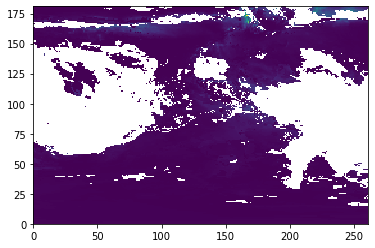

In [30]:
plt.pcolormesh(wetseason_mean)